created by Zsolt Elter (2020)

# Sjöstrand area method

Nils Göran Sjöstrand was one of the pioneers of reactor physics. He proposed an elegant method to measure the reactivity in subcritical reactors. His article from 1956, describing the area ratio method, is one of the most cited Swedish publications in reactor physics, and still today there is an interest in applying his work. The reason is the recent development of Accelerator Driven Systems envisoned to be able to reduce the lifetime of nuclear waste by transmuting it. Such systems are subcritical reactors driven by a strong neutron source. Thus being able to measure the subcritical reactivity is just as important for safety as it was nearly 70 years ago. (Further reading on Nils Göran Sjöstrand: https://www.chalmers.se/en/centres/snec/news/Pages/Nils-G%C3%B6ran-Sj%C3%B6strand-1925---2014.aspx)


The area method allows the determination of the reactivity in a subcritical nuclear reactor when a pulsed neutron source experiment is performed. Initillay the reactor is subcritical with a constant source, hence operating in steady state. A pulsed neutron source is added which allows for shooting neutrons into the reactor under a short period of time periodically, for example 1-2 $\mu s$ long pulses in each 12 ms. The technique is based on the analysis of the time response of detectors located in the reactor after the pulses. See the figures at https://www.chalmers.se/en/centres/snec/news/Pages/Nils-G%C3%B6ran-Sj%C3%B6strand-1925---2014.aspx or Fig. 5.1 at https://www.diva-portal.org/smash/get/diva2:315354/FULLTEXT01.pdf. The pulsing is needed because the background would be noisy for one single pulse only.

The time response has some distinct features. First the signal rises (neutrons need time to reach the detector) then there is an exponential decay of counts due to the prompt neutrons and finally one can observe an approximately constant tail due to the delayed neutrons. If one calculated the area under the prompt peak ($A_p$) and under the constant background ($A_d$), one can get a simple expression for the reactivity measured in \\$:

$$\frac{A_p}{A_d}=-\frac{\rho}{\beta}$$

where $\beta$ is the total delayed neutron fraction. There is also an other interesting quantity one can obtain from such a measurement. As described in Sec 5.2 of https://www.diva-portal.org/smash/get/diva2:315354/FULLTEXT01.pdf (page 42-43), by fitting an exponential to the downfalling side of the time response one can obtain $\frac{\Lambda}{\beta}$.

It is outside the scope of the current exercise to give an appropriate derivation of the area method. Here we just include a simple heuristic explanation. In case of $S$ neutrons are shot into the reactor than the sum of the neutrons in the coming generations is

$$S+Sk_{eff}+Sk_{eff}^2+...=\frac{S}{1-k_{eff}}$$

if one considers that the generation time $\Lambda$ is usually around $10^{-5}$ s, then one can see that in a few ms long cycle sufficient amount of generations can be observed. Thus, this sum is proportional to $A_p+A_n$. (Since the integration over time - ie. the area - would sum up the number of neutrons observed due to the initial number $S$).

If one considers only the neutron multiplication due to the prompt neutrons similarly

$$\frac{S}{1-(1-\beta)k_{eff}}$$

is going to be proportional to the area $A_p$, and then from the ratio

$$\frac{A_p+A_d}{A_p}=\frac{1-(1-\beta)k_{eff}}{1-k_{eff}}$$

one can derive the formula for the $A_p/A_d$ ratio.

# Exercise

In a pulsed source reactivity measurment the period is T=12 ms, and the width of the time bins are dt = 100 $\mu s$.

One observes the following counts in the detector.

In [9]:
counts=[223,1482,2298,2849,3210,3295,3329,3326,3163,3018,3015,2731,2598,2494,2294,2147,1982,1930,1768,1623,1544,1379,1365,1198,1090,970,1040,922,810,852,761,706,666,614,568,616,519,477,473,451,436,403,408,329,360,340,352,334,305,333,281,300,320,289,277,289,292,280,282,274,264,254,237,264,230,271,254,230,248,278,222,233,261,249,252,238,225,213,242,262,205,240,258,237,254,218,225,212,219,227,237,237,236,246,244,228,255,222,236,199]
import matplotlib.pyplot as plt

Let us plot these counts (without taking care of the actual time) and highlight the prompt+delayed and the delayed areas. We are going to define polygons for this. A polygon in matplotlib is defined by a list of coordinates of the corners (eg. for a triangle plt.Polygon([[x1,y1],[x2,y2],[x3,y3]]). The corners in our case are the count values, and we need to append coordinates for the y=0 cases as well. See below (try to comment out once the add_line(polygonP) and once the add_line(polygonD) line to make sure you understand what is being plotted). For the delayed area we consider that the counts in the roughly last 20 time bins are due to the delayed neutrons which is fine for the purpose of this visualization. 

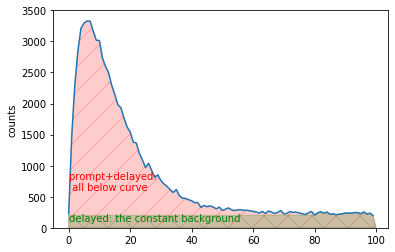

In [8]:
promptPolycorners=[[x,y] for x,y in enumerate(counts)] #all function x,y pairs will be a corner for polygon
#pythonic way of
#polycorners = []
#for x,y in enumerate(counts):
#    polycorners.append([x,y])
promptPolycorners.append([len(counts),0])
promptPolycorners.append([0,0])

delayedPolycorners=promptPolycorners[-22:] #22 instead of 20, because the two appended corners are also there!
delayedPolycorners.append([0,counts[-1]])

plt.figure()
plt.plot(counts)    
polygonP = plt.Polygon(promptPolycorners, True,color='red',alpha=0.2,hatch='/')
polygonD = plt.Polygon(delayedPolycorners, True,color='green',alpha=0.2,hatch='\\')
plt.gca().add_line(polygonP)
plt.text(0,600,'prompt+delayed: \n all below curve',color='r')
plt.gca().add_line(polygonD)
plt.text(0,100,'delayed: the constant background',color='green')
plt.ylabel('counts')
plt.ylim(0,3500)
plt.show()

a) Finish the derivation of the expression for the reactivity in \\$, $\rho/\beta_{eff}$, and determine the reactivity with Sjöstrand's area method. (Hint, create a "time" array, and then you can use the [trapz function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) from numpy (import numpy as np) to calculate the area)

b) Determine $\Lambda/\beta_{eff}$. (Hint, ignore the beginning of the response when fitting the curve, as mentioned in the reference that is a result of space dependent effects. You may use the [curve_fit function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) of the scipy.optimize module.) Assume $\beta = 650$ pcm, do you get a reasonable value for the prompt neutron generation time, $\Lambda$?

# Solutions - not given to students

a, the students should be able to perform an integral, and in some way evaluate the delayed area, and realize that in order to get the prompt area they have to substract the delayed area from the total.

In [3]:
import numpy as np
T=np.linspace(100e-6,len(counts)*100e-6,len(counts))

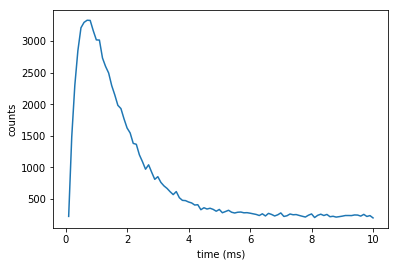

In [4]:
plt.figure()
plt.plot(T*1000,counts)
plt.xlabel('time (ms)')
plt.ylabel('counts')
plt.show()

In [5]:
Ad=np.mean(counts[-20:])*T[-1] #simple approximation, the mean of the last 20 counts is the background, multiplied by total measurement time
Apd=np.trapz(counts,T)
Ap=Apd-Ad

rhoDollar=-Ap/Ad
print('Reactivity is %.2f $'%rhoDollar)

Reactivity is -2.52 $


Just for some checking consider $\beta=0.0065$, and see what the k-eff would be.

In [6]:
beta=0.0065
rho=rhoDollar*beta
keff=1/(1-rho)

print(keff)

0.9838690477302364


Seems fine.

b, The students should be able to find out from where the exponential decay shape holds. And be able to fit.

In [7]:
from scipy.optimize import curve_fit
p1,p2=curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  T[6:],  counts[6:])
print(p1)

[5784.54063896 -716.57325023  190.30774117]


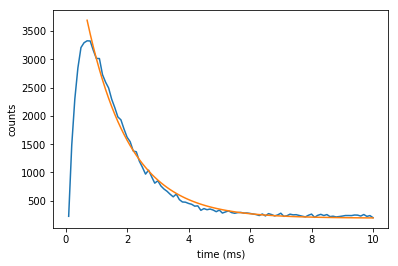

In [8]:
plt.figure()
plt.plot(T*1000,counts)
plt.plot(T[6:]*1000,p1[0]*np.exp(p1[1]*T[6:])+p1[2])
plt.xlabel('time (ms)')
plt.ylabel('counts')
plt.show()

In [9]:
alpha=p1[1]
LambdaBeta=(1/alpha)*(rhoDollar-1)

print(LambdaBeta)

0.004915580153025213


Again for some checking we can multiply with $\beta=0.0065$, and we see that we get the expected order of magnitudes.

In [10]:
print(LambdaBeta*beta)

3.195127099466388e-05
